In [1]:
#Импортируем все необходимые модули.
from pandas import Series
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

# 1. Знакомство с данными.

In [2]:
train=pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [3]:
train.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
1149,67683,16MAR2014,SCH,F,34,N,N,0,1,-1.853156,0,50,1,2,25000,1,2,N,0
13,70724,19MAR2014,GRD,M,30,N,N,0,1,-1.408512,0,50,1,2,30000,1,3,N,0
38003,18607,26JAN2014,SCH,M,25,Y,Y,0,0,-2.452262,1,50,1,2,30000,1,3,N,0
15541,80473,28MAR2014,GRD,M,39,Y,Y,0,1,-1.565097,6,40,1,2,60000,1,3,N,0
17339,3603,09JAN2014,PGR,F,46,N,N,0,0,-1.373729,0,60,2,3,28000,1,2,N,1


И так, данные есть численные, бинарные и категориальные. Отдельный интерес представляет колонка "app_date", в которой содержится дата. Эта информация должна быть преобразована в числовые данные. Информация об ID клиента не имеет для нас никокого смысла, ее лучше удалить.

Теперь стоит посмотреть, сколько надёжных и ненадёжных заёмщиков в выборке.

<AxesSubplot:>

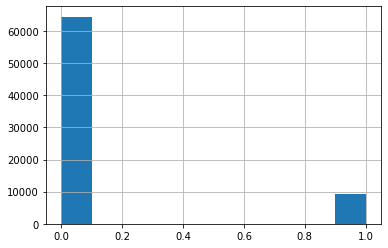

In [4]:
train.default.hist()

# 2. Предобработка данных.

2.1.Балансировка выборки

In [5]:
defaults = train.loc[train.default==1]
nondefaults= train.loc[train.default==0]
train=pd.concat([nondefaults.iloc[0:len(defaults)], defaults])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18744 entries, 0 to 73797
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         18744 non-null  int64  
 1   app_date          18744 non-null  object 
 2   education         18669 non-null  object 
 3   sex               18744 non-null  object 
 4   age               18744 non-null  int64  
 5   car               18744 non-null  object 
 6   car_type          18744 non-null  object 
 7   decline_app_cnt   18744 non-null  int64  
 8   good_work         18744 non-null  int64  
 9   score_bki         18744 non-null  float64
 10  bki_request_cnt   18744 non-null  int64  
 11  region_rating     18744 non-null  int64  
 12  home_address      18744 non-null  int64  
 13  work_address      18744 non-null  int64  
 14  income            18744 non-null  int64  
 15  sna               18744 non-null  int64  
 16  first_time        18744 non-null  int64 

 2.2. Удаляем лишний столбец с ID, удаляем пропуски. Пропуски есть только в столбце "education", и их мало. Их можно удалить без потерь точности.

In [6]:
train = train.dropna().iloc[:, 1:]

2.3. Преобразуем "app_date" в численную переменную. Для этого вычисляем к-во дней с со дня подачи заявки до сего дня.

In [7]:
train.app_date=train.app_date.apply(lambda x: (datetime.datetime.now()-datetime.datetime.strptime(x, "%d%b%Y")).days)
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18669 entries, 0 to 73797
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_date          18669 non-null  int64  
 1   education         18669 non-null  object 
 2   sex               18669 non-null  object 
 3   age               18669 non-null  int64  
 4   car               18669 non-null  object 
 5   car_type          18669 non-null  object 
 6   decline_app_cnt   18669 non-null  int64  
 7   good_work         18669 non-null  int64  
 8   score_bki         18669 non-null  float64
 9   bki_request_cnt   18669 non-null  int64  
 10  region_rating     18669 non-null  int64  
 11  home_address      18669 non-null  int64  
 12  work_address      18669 non-null  int64  
 13  income            18669 non-null  int64  
 14  sna               18669 non-null  int64  
 15  first_time        18669 non-null  int64  
 16  foreign_passport  18669 non-null  object

2.4.Разбиваем данные на численные, категориальные и биноминальные.

In [8]:
label_encoder = LabelEncoder()

for column in train[['sex', 'car','car_type', 'foreign_passport']]:
    train[column] = label_encoder.fit_transform(train[column])
    
num_data = train[['age','app_date','decline_app_cnt','score_bki', 'bki_request_cnt', 'region_rating', 'income']]
bin_data = train[['sex', 'car', 'car_type', 'sna', 'foreign_passport', 'first_time', 'good_work', 'default']]
cat_data = train[['education', 'home_address','work_address']]

 2.5. С образованием всё сложнее. Здесть недостаточно просто дать каждому варианту численное обозначение - варианты имеют между собой иерархическую связь.

<AxesSubplot:>

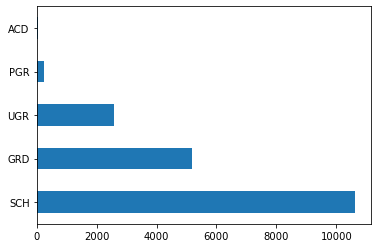

In [9]:
train.education.value_counts().plot.barh()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

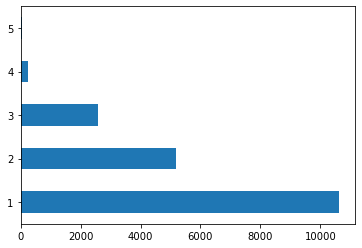

In [10]:
def educator (x):
    if x == 'SCH':
        x=1
    elif x == 'GRD':
        x=2
    elif x == 'UGR':
        x=3
    elif x == "PGR":
        x=4
    elif x == 'ACD':
        x=5
    return x
cat_data.education=cat_data.education.apply(educator)
cat_data.education.value_counts().plot.barh()

Теперь модель будет знать, что заёмщиков со средним образованием намного больше,чнм с академической степенью.

# 3. обработка численных переменных

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'app_date'}>,
        <AxesSubplot:title={'center':'decline_app_cnt'}>],
       [<AxesSubplot:title={'center':'score_bki'}>,
        <AxesSubplot:title={'center':'bki_request_cnt'}>,
        <AxesSubplot:title={'center':'region_rating'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 2160x2880 with 0 Axes>

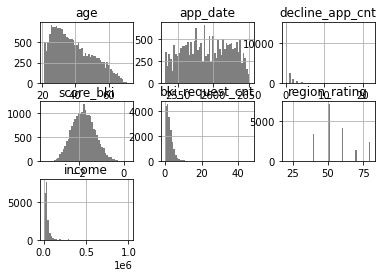

In [11]:
plt.figure(figsize=(15,20),dpi=144)
num_data.hist(color="k", alpha=0.5, bins=50)

3.1. установление корреляций

<AxesSubplot:>

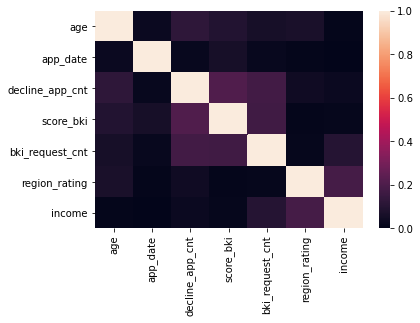

In [12]:
sns.heatmap(num_data.corr().abs(), vmin=0, vmax=1)

Доход сильнее всего связан с рейтингом региона, а кредитный рейтинг - с количеством отказов. Не удивительно.


3.2.Обработка выбросов

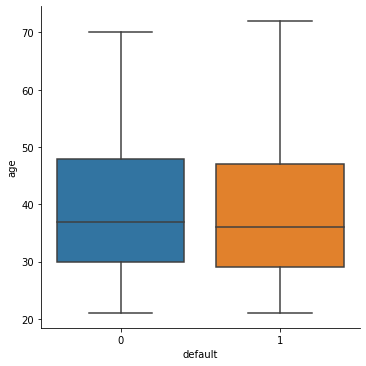

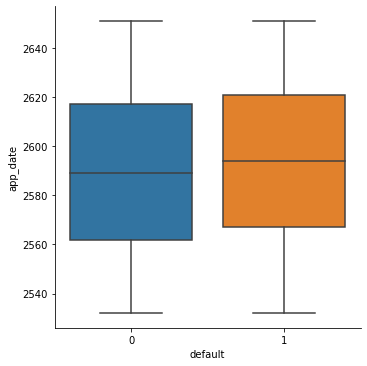

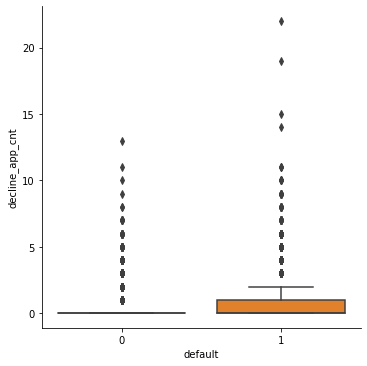

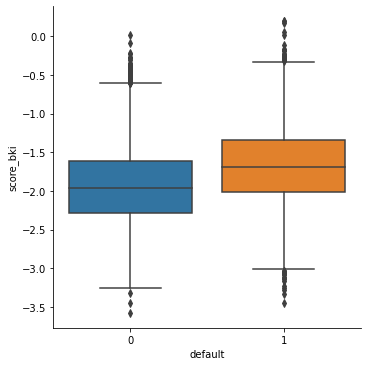

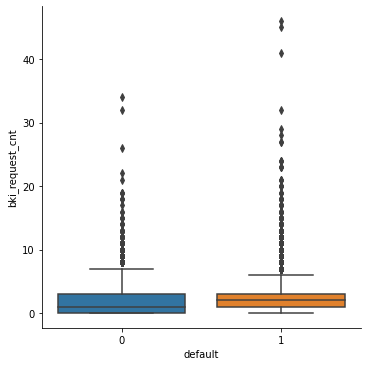

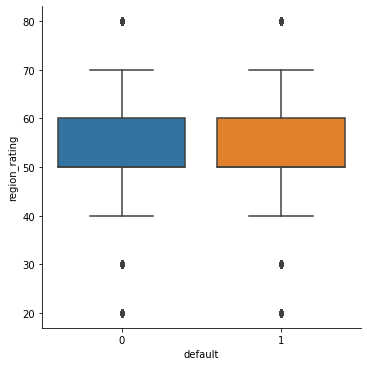

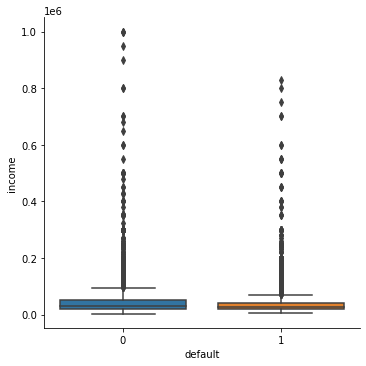

In [13]:
for column in num_data:
    sns.catplot(x="default", y=column, kind="box", data=train)
    

Во всех "банковских" данных очень много выбросов. Надо узнать их количество и по возможности от них избавиться. Выбросы рейтинга региона исключать смысла нет. Москва в медианном уровне доходов по России тот ещё выброс.

<AxesSubplot:>

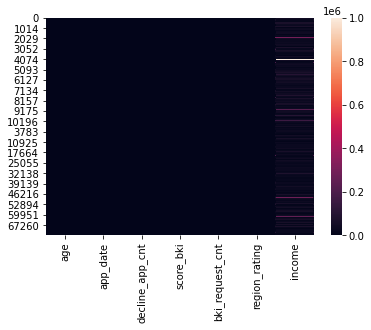

In [14]:
sns.heatmap(num_data)

В уровнях дохода очень много выбросов и, похоже, удалить их нельзя - лишимся части ценных данных.

3.3 Нормализация данных


In [15]:
num_data = StandardScaler().fit_transform(num_data)

# 4.Обучение модели

In [16]:
X = np.hstack([num_data, cat_data, bin_data.iloc[:,:-1]])
y = bin_data.iloc[:,-1] 
#Разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 5. Проверка модели

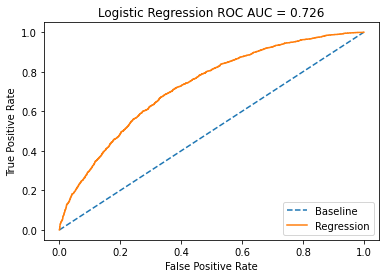

In [17]:
probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# 6. Настройка гиперпараметров

In [20]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации

C = np.random.uniform(0.02, 0.07, size=15)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
# View best hyperparameters
best_model = clf.fit(X_train, y_train)
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-tes

Лучшее Penalty: l2
Лучшее C: 0.02387658913108952


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.66827527        nan 0.66781621        nan 0.66781621
        nan 0.66773958        nan 0.66773955        nan 0.66766304
        nan 0.66781612        nan 0.66773955        nan 0.66827524
        nan 0.6681987         nan 0.6679692         nan 0.66781606
        nan 0.66804568        nan 0.66781606        nan 0.66812219]
  category=UserWarning


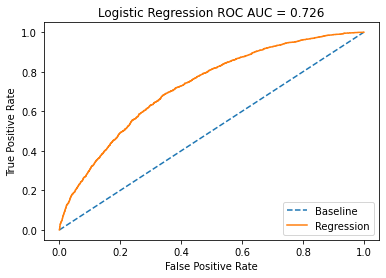

In [21]:
probs = best_model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

Настройка гиперпараметров мало влияет на качество модели.